# 演習1-4 

## パターン識別編（その3）MLP編

わからない場合や方針が立たない場合は PracticeHint にある同名のファイルを眺めてみてください．

In [1]:
import numpy as np
import matplotlib.pylab as plt

もう少し複雑な２次元の識別境界を考えてみる

In [2]:
N = 4000

x = np.random.uniform(low=-1, high=1, size=(N, 2))
y = np.zeros(N)

y[x[:, 1] - np.sin(2*np.pi* x[:,0]) > 0] = 1 #適当に正弦関数で境界を引く

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

(-1.0, 1.0)

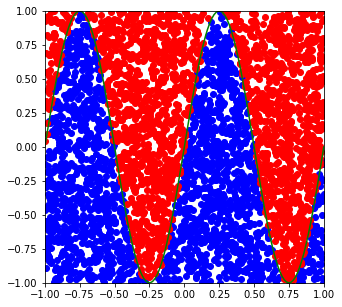

In [3]:
plt.figure(figsize=(5,5))
plt.plot(x[y==0, 0], x[y==0, 1], 'bo')
plt.plot(x[y==1, 0], x[y==1, 1], 'ro' )

xx = np.linspace(-1, 1, 128)
yy = np.sin(2*np.pi*xx)
plt.plot(xx, yy, 'g-')
plt.xlim(-1, 1)
plt.ylim(-1,1)

## 問い: 赤点と青点の境界を決めてクラスを判別することは可能か？

### Keras + Tensorflow を用いて，とりあえずロジスティック回帰(演習1-2参照)でやってみなさい


In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [5]:
# あとは演習1-2 を参照
# 以下にコードを書いていくこと
model = Sequential()
model.add(Dense(1,input_shape=(2,),use_bias=True))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

2022-01-26 16:49:21.276789: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


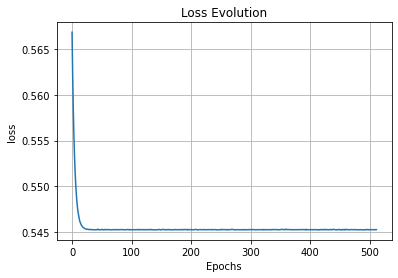

In [6]:
# ロスの値が学習によってどう変わるかを表示しなさい
hist = model.fit(x,y,epochs=512,verbose=0)
plt.plot(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()

In [7]:
# 結合とバイアスを取り出し，データと推定直線を表示しなさい
weights,biases=model.get_weights()
w0=float(biases)
w1=weights
print(w0)
print(w1)

0.06884995102882385
[[1.3344966]
 [1.9086306]]


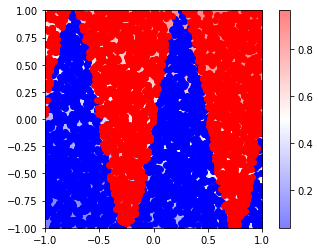

In [8]:
tplus=np.linspace(-1,1,128)
tminus=np.linspace(1,-1,128)
xx,yy=np.meshgrid(tplus,tminus)
xtest = np.hstack((xx.reshape(128*128,1),yy.reshape(128*128,1)))
plt.imshow(model.predict(xtest).reshape(128,128),extent=[-1,1,-1,1],cmap='bwr',alpha=0.5)
plt.colorbar()
plt.plot(x[y==0,0],x[y==0,1],'bo')
plt.plot(x[y==1,0],x[y==1,1],'ro')

### 多層パーセプトロン（MLP) で解く

このような複雑な境界を持つケースには，多層ニューラルネットを使ってといてみましょう．
MLPといってもそんなに複雑な手順が必要ではなく，`model.add` する階層を増やしてあげましょうというはなしになります．

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [10]:
# モデルに中間層を追加してみてください．
model = Sequential()
model.add(Dense(5,input_shape=(2,),use_bias=True))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [11]:

hist = model.fit(x,y,epochs=512,batch_size=100,verbose=0)

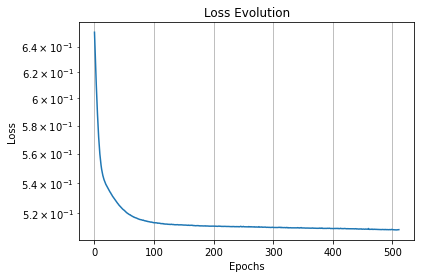

In [12]:
# ロスの値が学習によってどう変わるかを表示してみてください．
plt.semilogy(hist.history['loss'])
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()


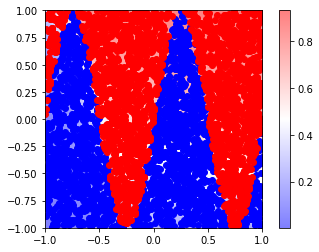

In [13]:
tplus=np.linspace(-1,1,128)
tminus=np.linspace(1,-1,128)
xx,yy=np.meshgrid(tplus,tminus)
xtest = np.hstack((xx.reshape(128*128,1),yy.reshape(128*128,1)))
plt.imshow(model.predict(xtest).reshape(128,128),extent=[-1,1,-1,1],cmap='bwr',alpha=0.5)
plt.colorbar()
plt.plot(x[y==0,0],x[y==0,1],'bo')
plt.plot(x[y==1,0],x[y==1,1],'ro')


## 考察
(以下では、3回実行してみて平均から考えている)
まず、epoch数を変えた。
epoch数=1024では,ロジスティック回帰の方では直線しか出すことができず、MLPでは、直線ではないような線も引けたが境界線をひけているとも言い難いような歪な線引きになった。
epoch数=2048では、MLPで歪ながら、境界線に線を引くことができた。
epoch数=4096では、MLPで割と綺麗に境界線に線を引くことができた。しかし、ロジスティック回帰の方では相変わらずできなかった。
ロジスティック回帰では、この境界線を表すことができなかった理由であるが、これは中間層のないニューラルネットワークの限界によるものであると考えられる。中間層のないニューラルネットワークの限界とは、中間層のないニューラルネットワークでは、一本の線(f(x))で区切ることのできない分類をすることができないというものである。
次に、epoch=512で固定して、点の個数を変えた。
点の個数が1000だと500の時より収束スピードは少し早くなっている(MLPの方は形が歪でよくわからない)が、得られるモデル自体は同じようなものだった。点の個数が2000だとMLPの方も少しだけ歪であるが、境界線の形になるようになってきた。点の個数が3000だと、もはやどこに線が引かれているかよくわからなくなっていた、ただおそらくはMLPの方は境界線に引けていると考えられる。点の個数が4000だと、どちらの図でもどこに線が引かれているか全然わからなくなった。以上より、epoch数とデータ数では大体同じような性能ではあるが、線の見やすさの都合上epoch数の方が良いように感じた。